<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220615.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor 
* customer analysis

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timedelta, timezone
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, mean_squared_error
import sklearn.datasets as skd

# regressor

In [14]:
raw = skd.load_diabetes()
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [15]:
x = x.assign(sex = np.where(x['sex'] > 0, 1, 0))
x_ = pd.get_dummies(x, columns = ['sex'])
x_.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,sex_0,sex_1
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,0,1
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,1,0
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,0,1
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,1,0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,1,0


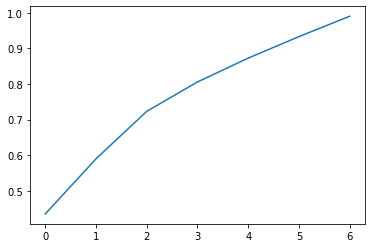

In [16]:
pca = PCA(n_components = 7)
fit_pca = pca.fit_transform(x_.iloc[:,:9])
plt.plot(pca.explained_variance_ratio_.cumsum())

In [20]:
fit_pca = pd.DataFrame(np.c_[fit_pca, x['sex'].values.reshape(-1, 1), y.reshape(-1, 1)], 
                       columns = [f'pc{a}' for a in range(1,8)] + ['sex', 'target'])
fit_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,sex,target
0,0.017589,0.084874,0.021830,0.012288,-0.045673,0.022532,0.026227,1.0,151.0
1,-0.127686,-0.066844,0.009249,0.015730,-0.047849,-0.008141,0.003393,0.0,75.0
2,0.002380,0.064413,0.033728,0.061622,-0.046702,0.043557,0.033018,1.0,141.0
3,0.010912,-0.004973,-0.103119,-0.038536,0.020592,-0.022411,0.004181,0.0,206.0
4,-0.028179,-0.031364,-0.000832,0.020419,-0.040164,-0.031187,-0.024010,0.0,135.0


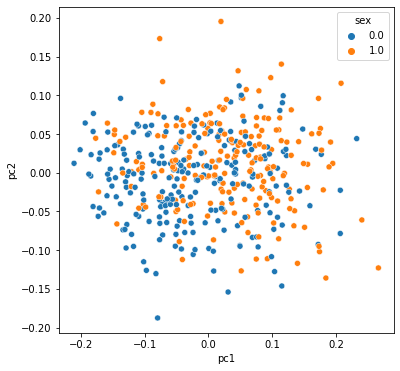

In [23]:
plt.figure(figsize = [6,6])
sns.scatterplot(data = fit_pca, x = 'pc1', y = 'pc2', hue = 'sex')

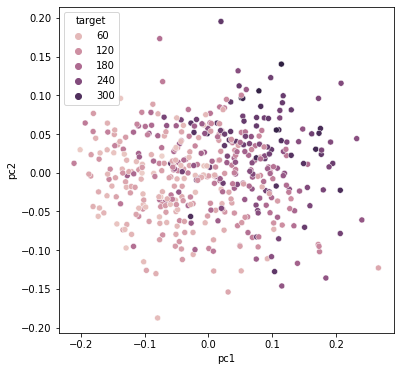

In [24]:
plt.figure(figsize = [6,6])
sns.scatterplot(data = fit_pca, x = 'pc1', y = 'pc2', hue = 'target')

In [25]:
x_tr, x_te, y_tr, y_te = train_test_split(x_, y, train_size = .7)

In [26]:
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)

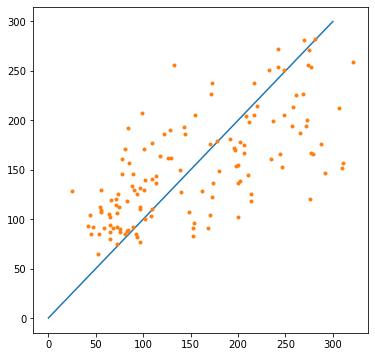

In [28]:
plt.figure(figsize = [6,6])
plt.plot([0,300], [0,300])
plt.plot(y_te, pred_rf, '.')

# customer analysis

In [29]:
os.listdir()

['.config',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'ecommerce-data.csv',
 'rfm_test.csv',
 'online_retail_II.xlsx',
 'retail_data_response.csv',
 'retail_data_transactions.csv',
 'sample_data']

In [30]:
df = pd.read_excel('online_retail_II.xlsx')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [31]:
df.columns = [a.replace(' ', '_').lower() for a in df.columns]
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [32]:
df.isnull().sum()

invoice             0
stockcode           0
description      2928
quantity            0
invoicedate         0
price               0
customer_id    107927
country             0
dtype: int64

In [48]:
df_ = df[~df['customer_id'].isnull()]
df_.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [49]:
df_ = df_[(df['country'] == 'United Kingdom') & (~df_['invoice'].astype(str).str.contains('C'))]
df_.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [50]:
df_['invoicedate'] = df_['invoicedate'].astype('datetime64[m]')
df_['date'] = df_['invoicedate'].astype('datetime64[D]')
df_['month'] = df_['invoicedate'].astype('datetime64[M]')
df_['rev'] = df_['price'] * df_['quantity']
df_.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,date,month,rev
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,2009-12-01,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,2009-12-01,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,2009-12-01,30.0


In [52]:
df_ = df_[['customer_id', 'date', 'month', 'rev']].rename(columns = {'customer_id': 'id'}).sort_values(['id', 'date'])
df_.head()

,id,date,month,rev
27994,12346.0,2009-12-14,2009-12-01,45.0
28251,12346.0,2009-12-14,2009-12-01,22.5
28254,12346.0,2009-12-14,2009-12-01,22.5
39398,12346.0,2009-12-18,2009-12-01,22.5
39411,12346.0,2009-12-18,2009-12-01,1.0


In [55]:
df_ = df_.groupby(['id', 'date', 'month'])['rev'].sum().reset_index()
df_.head()

,id,date,month,rev
0,12346.0,2009-12-14,2009-12-01,90.0
1,12346.0,2009-12-18,2009-12-01,23.5
2,12346.0,2010-01-04,2010-01-01,45.0
3,12346.0,2010-01-14,2010-01-01,22.5
4,12346.0,2010-01-22,2010-01-01,22.5


In [56]:
list_pu = df_.groupby(['id', 'month']).first().reset_index()
list_npu = df_.groupby(['id']).first().reset_index()
list_mon = list_pu['month'].sort_values().unique()

In [71]:
for mon in list_mon : 

  temp_npu = list_npu[list_npu['month'] == mon]
  temp_pu = list_pu[list_pu['id'].isin(temp_npu['id'])]
  temp = temp_pu.groupby(['month'])['id'].count().reset_index().rename(columns = {'id':'pu'})
  temp = temp.assign(npu_month = mon,
              num = temp['month'].rank(method = 'first')
              ).reindex(columns = ['npu_month', 'num', 'pu'])
  temp = temp.assign(ratio = lambda x : x['pu']/x['pu'].iloc[0])

  if mon == list_mon[0] :

    res = temp

  else : 

    res = pd.concat([res, temp], axis = 0)

res.head()

,npu_month,num,pu,ratio
0,2009-12-01,1.0,904,1.000000
1,2009-12-01,2.0,318,0.351770
2,2009-12-01,3.0,298,0.329646
3,2009-12-01,4.0,382,0.422566
4,2009-12-01,5.0,342,0.378319


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


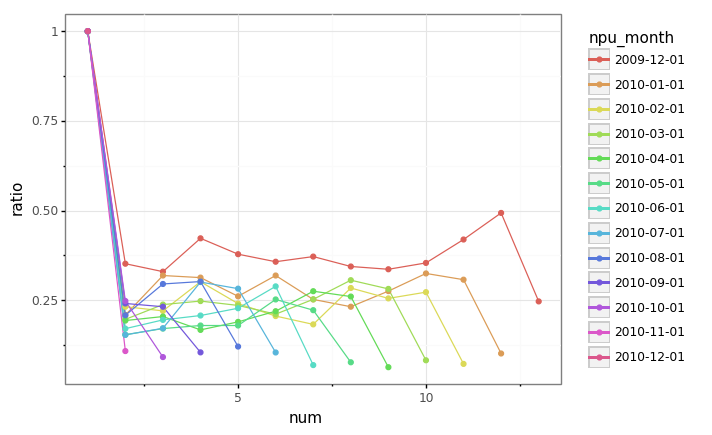

<ggplot: (8791454400037)>

In [72]:
(
    ggplot(
    res.assign(npu_month = res['npu_month'].astype(str)),
    aes('num', 'ratio', color = 'npu_month')) +
    gg.geom_line() +
    gg.geom_point() +
    gg.theme_bw()
)

In [102]:
cnt_df = df_.groupby(['id', 'month']).agg({'rev' : 'sum', 'id' : 'count'})
cnt_df.columns = ['money', 'freq']
cnt_df = cnt_df.reset_index()
cnt_df = pd.pivot_table(cnt_df, index = 'id', columns = 'month', values = ['money', 'freq'])
cnt_df = cnt_df.reset_index()
cnt_df

id       freq                                              \
month      NaT 2009-12-01 2010-01-01 2010-02-01 2010-03-01 2010-04-01   
0      12346.0        2.0        3.0        NaN        1.0        NaN   
1      12608.0        NaN        NaN        NaN        NaN        NaN   
2      12745.0        NaN        NaN        NaN        NaN        NaN   
3      12746.0        NaN        NaN        NaN        NaN        NaN   
4      12747.0        3.0        NaN        2.0        1.0        1.0   
...        ...        ...        ...        ...        ...        ...   
3966   18283.0        NaN        NaN        1.0        2.0        NaN   
3967   18284.0        NaN        NaN        NaN        NaN        NaN   
3968   18285.0        NaN        NaN        1.0        NaN        NaN   
3969   18286.0        1.0        NaN        NaN        NaN        NaN   
3970   18287.0        NaN        NaN        NaN        NaN        NaN   

                                                   ...      money             \
month 2010-05-01 2010-06-01 2010-07-01 2010-08-01  ... 2010-03-01 2010-04-01   
0            NaN        1.0        NaN        NaN  ...      27.05        NaN   
1            NaN        NaN        NaN        NaN  ...        NaN        NaN   
2            1.0        NaN        NaN        1.0  ...        NaN        NaN   
3            NaN        1.0        NaN        NaN  ...        NaN        NaN   
4            1.0        2.0        NaN        2.0  ...     210.89     213.28   
...          ...        ...        ...        ...  ...        ...        ...   
3966         NaN        NaN        NaN        1.0  ...     253.07        NaN   
3967         NaN        NaN        NaN        NaN  ...        NaN        NaN   
3968         NaN        NaN        NaN        NaN  ...        NaN        NaN   
3969         NaN        NaN        NaN        1.0  ...        NaN        NaN   
3970         1.0        NaN        NaN        NaN  ...        NaN        NaN   

                                                                         \
month 2010-05-01 2010-06-01 2010-07-01 2010-08-01 2010-09-01 2010-10-01   
0            NaN     142.31        NaN        NaN        NaN        NaN   
1            NaN        NaN        NaN        NaN        NaN     415.79   
2         456.92        NaN        NaN     266.93        NaN        NaN   
3            NaN     254.55        NaN        NaN        NaN        NaN   
4         267.37     666.25        NaN     629.68        NaN    1047.75   
...          ...        ...        ...        ...        ...        ...   
3966         NaN        NaN        NaN      92.00        NaN        NaN   
3967         NaN        NaN        NaN        NaN        NaN     461.68   
3968         NaN        NaN        NaN        NaN        NaN        NaN   
3969         NaN        NaN        NaN     833.48        NaN        NaN   
3970     1071.61        NaN        NaN        NaN      892.6        NaN   

                             
month 2010-11-01 2010-12-01  
0            NaN        NaN  
1            NaN        NaN  
2            NaN        NaN  
3            NaN        NaN  
4         394.75     358.56  
...          ...        ...  
3966      195.35        NaN  
3967         NaN        NaN  
3968         NaN        NaN  
3969         NaN        NaN  
3970      381.50        NaN  

[3971 rows x 27 columns]